# IMAGE SEGMENTATION USING KMEANS (SCI -KIT KMEANS++)

In [35]:
from matplotlib import pyplot as plt
import numpy as np

In [36]:
import cv2

In [37]:
img = cv2.imread('lion.jpg') #opencv reads the image as bgr

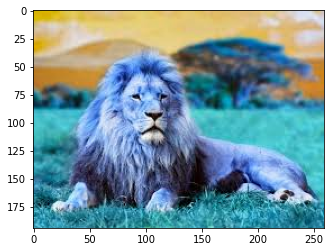

In [38]:
plt.imshow(img) 
plt.show()

In [39]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converting to rgb
original_shape = img.shape
print(img.shape)

(194, 259, 3)


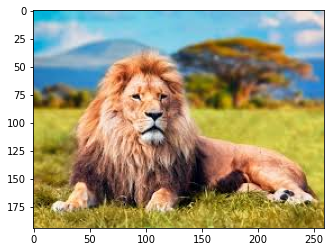

In [40]:
plt.imshow(img) 
plt.show()

In [41]:
# Flatten Each channel of the Image
all_pixels  = img.reshape((-1,3)) #flat matrix for each of the 3 sections of rgb
print(all_pixels.shape)

(50246, 3)


In [42]:
from sklearn.cluster import KMeans

In [43]:
km = KMeans?

In [46]:
km = KMeans

In [47]:
#init
km = KMeans

In [48]:
dominant_colors = 4  #divide clusters of colors into 4 types of colors
km = KMeans(n_clusters=dominant_colors)

#training i.e each pixel will be allotted color according to the nearest
km.fit(all_pixels)

KMeans(n_clusters=4)

In [49]:
centres = km.cluster_centers_ #rgb values of the colors

In [50]:
print(centres)

[[231.91772998 193.1676996  163.6724997 ]
 [ 95.39776458  72.11661716  40.64944505]
 [113.61581519 179.77432252 210.52012439]
 [181.33025378 153.30660062  72.0050089 ]]


In [51]:
centres = np.array(centres,dtype='uint8')
print(centres)

[[231 193 163]
 [ 95  72  40]
 [113 179 210]
 [181 153  72]]


### plotting the colors 

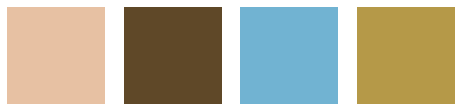

In [52]:
i = 1

plt.figure(0,figsize=(8,2))

colors = []

for each_color in centres:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_color)
    
    a = np.zeros((100,100,3),dtype='uint8') #Color Swatch
    a[:,:,:] = each_color
    plt.imshow(a)
    
plt.show()

## segmenting our image

In [53]:
new_img = np.zeros((194*259,3),dtype='uint8') #shape of the original flattened image
print(new_img.shape)

(50246, 3)


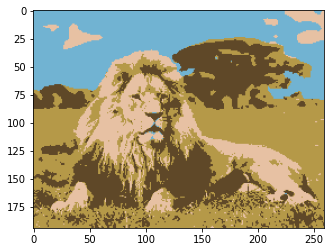

In [54]:
for ix in range(new_img.shape[0]): #iterating over each pixel
    new_img[ix] = colors[km.labels_[ix]] #labels provides id(mapping of cluster) for each pixel
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()